# Data Science and Big Data with Python


Data Science and Big Data techniques allow us to process, clean, analyze, and derive insights from large datasets. This notebook provides a comprehensive guide to handling data and using distributed computing for Big Data tasks.

## Topics Covered:
1. Working with CSV, JSON, and Excel files
2. Handling Missing Data
3. Data Cleaning and Preprocessing
4. Exploratory Data Analysis (EDA)

## 1. Working with CSV, JSON, and Excel files


### Overview
- Python provides powerful libraries like `pandas` to work with different file formats.
- **CSV**: Comma-separated values files, used for tabular data.
- **JSON**: JavaScript Object Notation, used for hierarchical data.
- **Excel**: Microsoft Excel files, used for structured data.

#### Key Functions:
- `pd.read_csv()`, `pd.read_json()`, and `pd.read_excel()` for reading files.
- `DataFrame.to_csv()`, `DataFrame.to_json()`, and `DataFrame.to_excel()` for saving files.


In [1]:

import pandas as pd

# Reading a CSV file
csv_data = pd.read_csv("example.csv")
print("CSV Data:\n", csv_data.head())


# Reading a JSON file
json_data = pd.read_json("example.json")
print("JSON Data:\n", json_data.head())

# Reading an Excel file
excel_data = pd.read_excel("example.xlsx")
print("Excel Data:\n", excel_data.head())

CSV Data:
       Name  Age  Salary
0    Alice   30   50000
1      Bob   25   40000
2  Charlie   35   70000
JSON Data:
       Name  Age  Salary
0    Alice   30   50000
1      Bob   25   40000
2  Charlie   35   70000
Excel Data:
       Name  Age  Salary
0    Alice   30   50000
1      Bob   25   40000
2  Charlie   35   70000


## 2. Handling Missing Data


### Overview
- Missing data can occur due to various reasons, and handling it is crucial for accurate analysis.
- Techniques include:
  - Dropping rows or columns with missing values.
  - Filling missing values with a default value, mean, median, or mode.

#### Key Functions:
- `DataFrame.dropna()` to remove missing data.
- `DataFrame.fillna()` to fill missing data.


In [5]:

# Example: Handling Missing Data
data = {'Name': ['Alice', 'Bob', None], 'Age': [25, None, 30], 'Salary': [50000, 60000, None]}
df = pd.DataFrame(data)

# Display the original data
print("Original Data:\n", df)

# Drop rows with missing values
print("Data after dropping missing values:\n", df.dropna())

# Fill missing values with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
print("Data after filling missing values:\n", df)


Original Data:
     Name   Age   Salary
0  Alice  25.0  50000.0
1    Bob   NaN  60000.0
2   None  30.0      NaN
Data after dropping missing values:
     Name   Age   Salary
0  Alice  25.0  50000.0
Data after filling missing values:
     Name   Age   Salary
0  Alice  25.0  50000.0
1    Bob  27.5  60000.0
2   None  30.0      NaN


## 3. Data Cleaning and Preprocessing


### Overview
- Data cleaning involves removing or correcting inaccurate, incomplete, or irrelevant data.
- Preprocessing prepares data for analysis or machine learning.

#### Techniques:
- Removing duplicates: `DataFrame.drop_duplicates()`.
- Normalization: Scaling data to a specific range.
- Encoding categorical variables: `pd.get_dummies()` or `LabelEncoder`.



In [9]:

from sklearn.preprocessing import MinMaxScaler

# Example: Data Cleaning and Preprocessing
data = {'Name': ['Alice', 'Bob', 'Alice'], 'Age': [25, 30, 25], 'Salary': [50000, 60000, 50000]}
df = pd.DataFrame(data)

# Remove duplicates
df = df.drop_duplicates()
print("Data after removing duplicates:\n", df)

# Normalize Salary
scaler = MinMaxScaler()
df['Normalized Salary'] = scaler.fit_transform(df[['Salary']])
print("Data after normalization:\n", df)


Data after removing duplicates:
     Name  Age  Salary
0  Alice   25   50000
1    Bob   30   60000
Data after normalization:
     Name  Age  Salary  Normalized Salary
0  Alice   25   50000                0.0
1    Bob   30   60000                1.0


## 4. Exploratory Data Analysis (EDA)


### Overview
- EDA is the process of analyzing datasets to summarize their main characteristics.
- Tools include descriptive statistics and data visualization.

#### Key Functions:
- `DataFrame.describe()` for statistical summary.
- `sns.pairplot()` and `sns.heatmap()` for visualization.


Statistical Summary:
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


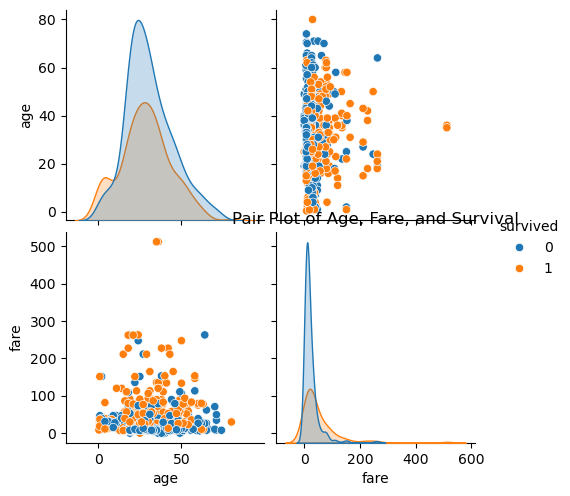

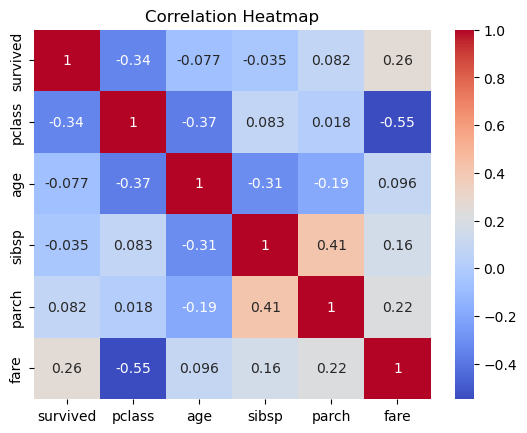

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
data = sns.load_dataset("titanic")

# Display statistical summary of numeric columns
print("Statistical Summary:\n", data.describe())

# Pair plot: Select numeric columns only and drop missing values
sns.pairplot(data[['age', 'fare', 'survived']].dropna(), hue='survived')
plt.title("Pair Plot of Age, Fare, and Survival")
plt.show()

# Correlation heatmap: Compute correlation for numeric columns
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
